In [ ]:
#Import bibliotheques
import pandas as pd
import numpy as np
from datetime import date
from keras.models import model_from_json


In [ ]:
df=pd.read_csv('/content/drive/My Drive/datasetratingfinal.csv')

In [ ]:
df

,Unnamed: 0,Id_User,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,prix,Year_dep,Month_dep,day_dep,weekday_name_dep,Hour_dep,minute_dep,day_arr,weekday_name_arr,Hour_arr,minute_arr,hour_duree,minute_duree,nombre_place,Moyen_de_transport,traffic,route,securite,accident,comfort,rating
0,243462,74337,KENITRA,34.264570,-6.570169,AGADIR,30.422037,-9.559509,601.177000,168.32956,2018,7,20,Friday,23,45,21,Saturday,5,19,5,34,1,Voiture,2,national,0,1,0,0
1,132267,64156,MEKNES,42.651545,-1.309065,AGADIR,30.422037,-9.559509,699.790001,209.93700,2018,8,3,Friday,18,28,4,Saturday,13,59,19,31,22,autocar,2,autoroute,1,1,0,1
2,507014,38640,FES,34.034653,-5.016193,NADOR,35.051918,-2.824399,303.835000,85.07380,2019,2,4,Monday,11,12,4,Monday,14,34,3,22,3,Voiture,1,autoroute,1,0,1,3
3,50783,34244,MEKNES,42.651545,-1.309065,MOHAMMADIA,33.695838,-7.389329,215.394001,53.84850,2018,4,23,Monday,23,6,24,Tuesday,1,14,2,8,3,Voiture,1,national,0,0,0,1
4,47186,98100,KENITRA,34.264570,-6.570169,MARRAKECH,31.625826,-7.989161,377.624000,105.73472,2019,1,12,Saturday,23,4,13,Sunday,2,38,3,34,3,Voiture,2,national,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177534,611064,83934,TANGER,35.777103,-5.803792,BERRECHID,33.267675,-7.581147,376.530999,75.30620,2019,2,15,Friday,22,3,16,Saturday,1,41,3,38,4,Voiture,1,national,0,0,0,1
1177535,287137,96096,BENI MELLAL,32.334193,-6.353335,OUARZAZATE,30.920193,-6.910923,299.602000,83.88856,2018,9,18,Tuesday,10,6,18,Tuesday,14,41,4,35,3,Voiture,0,national,1,0,0,2
1177536,356497,98729,CASABLANCA,33.595063,-7.618777,MOHAMMADIA,33.695838,-7.389329,30.024001,8.40672,2018,11,21,Wednesday,7,31,21,Wednesday,8,1,0,30,2,Voiture,1,national,1,0,1,3
1177537,99991,80519,MEKNES,42.651545,-1.309065,NADOR,35.051918,-2.824399,361.040000,108.31200,2019,3,16,Saturday,21,15,17,Sunday,8,30,11,15,28,autocar,2,national,1,1,0,1


In [ ]:
df['id_trajet'] =pd.Series(range(1,1177540))

In [ ]:
df

,Unnamed: 0,Id_User,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,prix,Year_dep,Month_dep,day_dep,weekday_name_dep,Hour_dep,minute_dep,day_arr,weekday_name_arr,Hour_arr,minute_arr,hour_duree,minute_duree,nombre_place,Moyen_de_transport,traffic,route,securite,accident,comfort,rating,id_trajet
0,243462,74337,KENITRA,34.264570,-6.570169,AGADIR,30.422037,-9.559509,601.177000,168.32956,2018,7,20,Friday,23,45,21,Saturday,5,19,5,34,1,Voiture,2,national,0,1,0,0,1
1,132267,64156,MEKNES,42.651545,-1.309065,AGADIR,30.422037,-9.559509,699.790001,209.93700,2018,8,3,Friday,18,28,4,Saturday,13,59,19,31,22,autocar,2,autoroute,1,1,0,1,2
2,507014,38640,FES,34.034653,-5.016193,NADOR,35.051918,-2.824399,303.835000,85.07380,2019,2,4,Monday,11,12,4,Monday,14,34,3,22,3,Voiture,1,autoroute,1,0,1,3,3
3,50783,34244,MEKNES,42.651545,-1.309065,MOHAMMADIA,33.695838,-7.389329,215.394001,53.84850,2018,4,23,Monday,23,6,24,Tuesday,1,14,2,8,3,Voiture,1,national,0,0,0,1,4
4,47186,98100,KENITRA,34.264570,-6.570169,MARRAKECH,31.625826,-7.989161,377.624000,105.73472,2019,1,12,Saturday,23,4,13,Sunday,2,38,3,34,3,Voiture,2,national,0,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177534,611064,83934,TANGER,35.777103,-5.803792,BERRECHID,33.267675,-7.581147,376.530999,75.30620,2019,2,15,Friday,22,3,16,Saturday,1,41,3,38,4,Voiture,1,national,0,0,0,1,1177535
1177535,287137,96096,BENI MELLAL,32.334193,-6.353335,OUARZAZATE,30.920193,-6.910923,299.602000,83.88856,2018,9,18,Tuesday,10,6,18,Tuesday,14,41,4,35,3,Voiture,0,national,1,0,0,2,1177536
1177536,356497,98729,CASABLANCA,33.595063,-7.618777,MOHAMMADIA,33.695838,-7.389329,30.024001,8.40672,2018,11,21,Wednesday,7,31,21,Wednesday,8,1,0,30,2,Voiture,1,national,1,0,1,3,1177537
1177537,99991,80519,MEKNES,42.651545,-1.309065,NADOR,35.051918,-2.824399,361.040000,108.31200,2019,3,16,Saturday,21,15,17,Sunday,8,30,11,15,28,autocar,2,national,1,1,0,1,1177538


In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df

,Id_User,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,prix,Year_dep,Month_dep,day_dep,weekday_name_dep,Hour_dep,minute_dep,day_arr,weekday_name_arr,Hour_arr,minute_arr,hour_duree,minute_duree,nombre_place,Moyen_de_transport,traffic,route,securite,accident,comfort,rating,id_trajet
0,74337,KENITRA,34.264570,-6.570169,AGADIR,30.422037,-9.559509,601.177000,168.32956,2018,7,20,Friday,23,45,21,Saturday,5,19,5,34,1,Voiture,2,national,0,1,0,0,1
1,64156,MEKNES,42.651545,-1.309065,AGADIR,30.422037,-9.559509,699.790001,209.93700,2018,8,3,Friday,18,28,4,Saturday,13,59,19,31,22,autocar,2,autoroute,1,1,0,1,2
2,38640,FES,34.034653,-5.016193,NADOR,35.051918,-2.824399,303.835000,85.07380,2019,2,4,Monday,11,12,4,Monday,14,34,3,22,3,Voiture,1,autoroute,1,0,1,3,3
3,34244,MEKNES,42.651545,-1.309065,MOHAMMADIA,33.695838,-7.389329,215.394001,53.84850,2018,4,23,Monday,23,6,24,Tuesday,1,14,2,8,3,Voiture,1,national,0,0,0,1,4
4,98100,KENITRA,34.264570,-6.570169,MARRAKECH,31.625826,-7.989161,377.624000,105.73472,2019,1,12,Saturday,23,4,13,Sunday,2,38,3,34,3,Voiture,2,national,0,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177534,83934,TANGER,35.777103,-5.803792,BERRECHID,33.267675,-7.581147,376.530999,75.30620,2019,2,15,Friday,22,3,16,Saturday,1,41,3,38,4,Voiture,1,national,0,0,0,1,1177535
1177535,96096,BENI MELLAL,32.334193,-6.353335,OUARZAZATE,30.920193,-6.910923,299.602000,83.88856,2018,9,18,Tuesday,10,6,18,Tuesday,14,41,4,35,3,Voiture,0,national,1,0,0,2,1177536
1177536,98729,CASABLANCA,33.595063,-7.618777,MOHAMMADIA,33.695838,-7.389329,30.024001,8.40672,2018,11,21,Wednesday,7,31,21,Wednesday,8,1,0,30,2,Voiture,1,national,1,0,1,3,1177537
1177537,80519,MEKNES,42.651545,-1.309065,NADOR,35.051918,-2.824399,361.040000,108.31200,2019,3,16,Saturday,21,15,17,Sunday,8,30,11,15,28,autocar,2,national,1,1,0,1,1177538


In [ ]:
count = df['Id_User'].value_counts()
print(count)

99336    2369
69227    2074
96745    1806
86291    1719
86778    1714
         ... 
95829     164
85353     164
76867     159
94472     147
58771     141
Name: Id_User, Length: 1954, dtype: int64


In [ ]:
#extract the categorial featuers
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,Ville de depart,Ville d'arrivée,weekday_name_dep,weekday_name_arr,Moyen_de_transport,route
0,KENITRA,AGADIR,Friday,Saturday,Voiture,national
1,MEKNES,AGADIR,Friday,Saturday,autocar,autoroute
2,FES,NADOR,Monday,Monday,Voiture,autoroute
3,MEKNES,MOHAMMADIA,Monday,Tuesday,Voiture,national
4,KENITRA,MARRAKECH,Saturday,Sunday,Voiture,national


In [ ]:
#convert valeurs categorielles
df1=pd.get_dummies(df, columns=["weekday_name_dep","weekday_name_arr","Moyen_de_transport",'route'], prefix=["week_dep","week_arr","transport",'route'])

In [ ]:
df.drop(['id_trajet','Ville de depart',"Ville d'arrivée",'traffic','securite','accident','comfort'],axis=1,inplace=True) 

In [ ]:
df2=df1[['Id_User','Latitude','Longitude','Latitude.1','Longitude.1','Distance','prix','Year_dep','Month_dep','day_dep','Hour_dep','minute_dep','day_arr','Hour_arr','minute_arr','hour_duree','minute_duree','nombre_place','week_dep_Friday','week_dep_Monday','week_dep_Saturday','week_dep_Sunday','week_dep_Thursday','week_dep_Tuesday','week_dep_Wednesday','week_arr_Friday','week_arr_Monday','week_arr_Saturday','week_arr_Sunday','week_arr_Thursday','week_arr_Tuesday','week_arr_Wednesday','transport_CTM','transport_Voiture','transport_autocar','route_autoroute','route_national','rating']]

In [ ]:
df2 

,Id_User,Latitude,Longitude,Latitude.1,Longitude.1,Distance,prix,Year_dep,Month_dep,day_dep,Hour_dep,minute_dep,day_arr,Hour_arr,minute_arr,hour_duree,minute_duree,nombre_place,week_dep_Friday,week_dep_Monday,week_dep_Saturday,week_dep_Sunday,week_dep_Thursday,week_dep_Tuesday,week_dep_Wednesday,week_arr_Friday,week_arr_Monday,week_arr_Saturday,week_arr_Sunday,week_arr_Thursday,week_arr_Tuesday,week_arr_Wednesday,transport_CTM,transport_Voiture,transport_autocar,route_autoroute,route_national,rating
0,74337,34.264570,-6.570169,30.422037,-9.559509,601.177000,168.32956,2018,7,20,23,45,21,5,19,5,34,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,64156,42.651545,-1.309065,30.422037,-9.559509,699.790001,209.93700,2018,8,3,18,28,4,13,59,19,31,22,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
2,38640,34.034653,-5.016193,35.051918,-2.824399,303.835000,85.07380,2019,2,4,11,12,4,14,34,3,22,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,3
3,34244,42.651545,-1.309065,33.695838,-7.389329,215.394001,53.84850,2018,4,23,23,6,24,1,14,2,8,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,98100,34.264570,-6.570169,31.625826,-7.989161,377.624000,105.73472,2019,1,12,23,4,13,2,38,3,34,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177534,83934,35.777103,-5.803792,33.267675,-7.581147,376.530999,75.30620,2019,2,15,22,3,16,1,41,3,38,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
1177535,96096,32.334193,-6.353335,30.920193,-6.910923,299.602000,83.88856,2018,9,18,10,6,18,14,41,4,35,3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,2
1177536,98729,33.595063,-7.618777,33.695838,-7.389329,30.024001,8.40672,2018,11,21,7,31,21,8,1,0,30,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,3
1177537,80519,42.651545,-1.309065,35.051918,-2.824399,361.040000,108.31200,2019,3,16,21,15,17,8,30,11,15,28,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1


In [ ]:
X = df2.iloc[:,0:37].values
y = df2.iloc[:,37].values
print('The independent features set: ')
print(X[:,0:37])

The independent features set: 
[[ 7.43370000e+04  3.42645700e+01 -6.57016900e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 6.41560000e+04  4.26515447e+01 -1.30906530e+00 ...  1.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 3.86400000e+04  3.40346534e+01 -5.01619260e+00 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 ...
 [ 9.87290000e+04  3.35950627e+01 -7.61877680e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 8.05190000e+04  4.26515447e+01 -1.30906530e+00 ...  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 9.06010000e+04  3.57771030e+01 -5.80379200e+00 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]]


In [ ]:
import keras
import keras.utils
y=keras.utils.to_categorical(y, num_classes=None, dtype='float32')
y

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
#Preprocessing
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

np.save('/content/drive/My Drive/scaler.npy',min_max_scaler) 

In [ ]:
X_scale

array([[0.73173868, 0.05585892, 0.02980151, ..., 0.        , 0.        ,
        1.        ],
       [0.62530187, 0.17572948, 0.07892202, ..., 1.        , 1.        ,
        0.        ],
       [0.35854599, 0.05257284, 0.04431027, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.98674375, 0.04629001, 0.02001114, ..., 0.        , 0.        ,
        1.        ],
       [0.79636812, 0.17572948, 0.07892202, ..., 1.        , 0.        ,
        1.        ],
       [0.90176994, 0.07747675, 0.03695682, ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
#division data to train and test
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(824277, 37) (176631, 37) (176631, 37) (824277, 5) (176631, 5) (176631, 5)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras.layers import Activation
from keras.layers import Dropout 
from keras import regularizers

In [ ]:
#implementation ANN
model = Sequential()
#First Hidden Layer
model.add(layers.Dense(18,input_dim=37, use_bias=False,kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(Activation("relu"))
Dropout(0.3)
#Second  Hidden Layer
model.add(layers.Dense(18, use_bias=False,kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(Activation("relu"))
Dropout(0.3)
#Output Layer
model.add(Dense(5,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))

In [ ]:
model.compile(optimizer='sgd',              loss='categorical_crossentropy',              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train,          batch_size=32, epochs=5,          validation_data=(X_val, Y_val)) 

Train on 824277 samples, validate on 176631 samples
Epoch 1/5
824277/824277 [==============================] - 43s 52us/step - loss: 0.7381 - accuracy: 0.7461 - val_loss: 0.5591 - val_accuracy: 0.7995
Epoch 2/5
824277/824277 [==============================] - 42s 51us/step - loss: 0.5831 - accuracy: 0.7874 - val_loss: 0.5521 - val_accuracy: 0.7934
Epoch 3/5
824277/824277 [==============================] - 43s 53us/step - loss: 0.5669 - accuracy: 0.7909 - val_loss: 0.5520 - val_accuracy: 0.7953
Epoch 4/5
824277/824277 [==============================] - 44s 54us/step - loss: 0.5585 - accuracy: 0.7919 - val_loss: 0.5291 - val_accuracy: 0.8017
Epoch 5/5
824277/824277 [==============================] - 41s 50us/step - loss: 0.5522 - accuracy: 0.7939 - val_loss: 0.5198 - val_accuracy: 0.8067


In [ ]:
# serialize classifier to JSON
classifier_json = model.to_json()
with open("/content/drive/My Drive/model.json", "w") as json_file:
    json_file.write(classifier_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/model.h5")
print("Saved classifier to disk")

Saved classifier to disk


In [ ]:
model.evaluate(X_test, Y_test)[1]

176631/176631 [==============================] - 4s 21us/step


0.7897934317588806

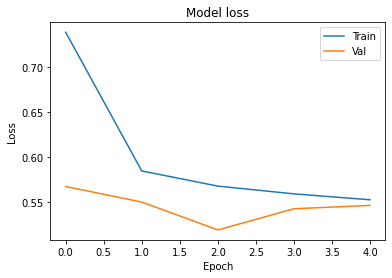

In [ ]:
#visualisation epoch en fonction de loss
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

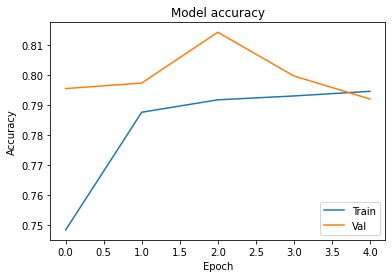

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
ypred=np.argmax(y_pred, axis=1)


In [ ]:
Ytest=np.argmax(Y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix 
cf_matrix = confusion_matrix (Ytest, ypred) 
print (cf_matrix)

[[36072   816     0     0     0]
 [ 6094 34022  1827    66     0]
 [  282 10102 26392  5375   313]
 [    1   264  2171 26481  3949]
 [    0     1    42  2656 19705]]


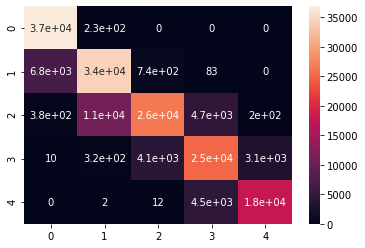

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)


0 4


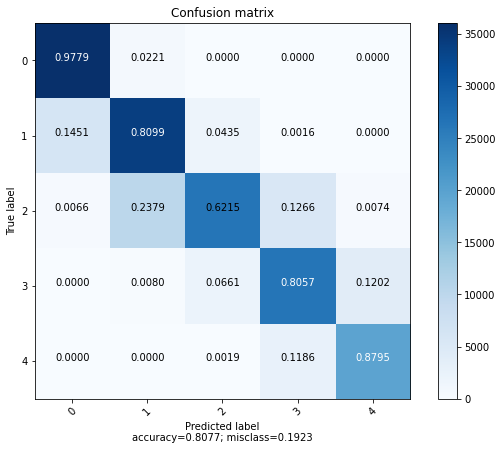

In [ ]:

#visualisation confusion matrix
import matplotlib.pyplot as plt
import itertools 
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


y_pred = model.predict(X_test)
ypred=np.argmax(y_pred, axis=1)
Ytest=np.argmax(Y_test, axis=1)
print(ypred.min(),ypred.max())
cm = confusion_matrix(Ytest, ypred)
plot_confusion_matrix(cm,range(Ytest.min(),Ytest.max()+1),normalize=True)

In [ ]:

print(data.dtypes)

In [ ]:
# a function dtaht split a trip inti sub-trips
def splitTrip(trip):
  """
  -- params :
    trip : a row of the data set contains all infos about the trip

  -- return : 5 sub-trips 
  """
  # we get the coords  of the trip , from and to coords
  coords = ((trip['Longitude'],trip['Latitude']),(trip['Longitude.1'],trip['Latitude.1']))
  client = openrouteservice.Client(key='5b3ce3597851110001cf6248225c604ec0994b1e9675e284a7bd7887')
  routes = client.directions(coords)
  # print(routes) 
  decoded = convert.decode_polyline(routes['routes'][0]['geometry']) 
  coords = decoded['coordinates']
  steps = routes['routes'][0]['segments'][0]['steps']


  # we constract the segments by summing distance and suration of steps 
  wayPoints = np.random.choice(range(len(steps))[1:-1],5) # choose randomly 5 point feom steps and that give us 6 segments
  start = coords[0]
  distance = 0
  duration = 0
  subTrips = []

  for i in range(len(steps)):
    distance += steps[i]['distance']
    duration += steps[i]['duration']

    if i in wayPoints:
      end = coords[steps[i]['way_points'][1]]
      subTrips.append([start,end,distance,duration])
      start = end
      distance = 0
      duration = 0
  subTrips.append([start,end,distance,duration])

  # now we have the trip splited into sub trips with durations and distances , we have to add other inforamtion, but we have one problem is the price of sub trip we will fix it o saf
  data  = []
  price = trip['prix'] / trip['Distance']
  hdepart = trip['Hour_dep']
  mdepart = trip['minute_dep']

  for sub in subTrips:
    harrive , marrive = addtime(hdepart,mdepart,sub[3]/60)
    data.append([trip['Unnamed: 0'], trip['Id_User'], trip['Ville de depart'],sub[0][1],sub[0][0],
                  trip["Ville d'arrivée"],sub[1][1],sub[1][0], sub[2]/1000, price * sub[2]/1000, trip['Year_dep'], 
                 trip['Month_dep'], trip['day_dep'], hdepart, mdepart, trip['day_arr'], harrive , marrive, 
                 sub[3]/3600, sub[3]/60, trip['nombre_place'], trip['traffic'], trip['securite'], trip['accident'], trip['comfort'], 
                 trip['rating'], trip['week_dep_Friday'], trip['week_dep_Monday'], trip['week_dep_Saturday'], trip['week_dep_Sunday'], trip['week_dep_Thursday'], 
                 trip['week_dep_Tuesday'],trip[ 'week_dep_Wednesday'], trip['week_arr_Friday'],trip[ 'week_arr_Monday'],trip['week_arr_Saturday'], trip['week_arr_Sunday'], 
                 trip['week_arr_Thursday'], trip['week_arr_Tuesday'], trip['week_arr_Wednesday'], trip['transport_CTM'], trip['transport_Voiture'],trip[ 'transport_autocar'],
                 trip['route_autoroute'],trip[ 'route_national']])
    hdepart = harrive
    mdepart = marrive
  
  return data , np.array(data).shape[0]

def addtime(h,m,min):
  m += min
  h += m//60
  m %= 60
  h %= 24
  return h,m

In [ ]:
def dayOfWeek(d):
    year, month, day = (x for x in d.split('/'))
    if len(day) == 4: #'YYYY/MM/DD or DD/MM/YYYY'
        tmp = day
        day = year
        year= tmp
    day, month, year = int(day), int(month), int(year)
    dow = date(year, month, day).weekday() # return just a number from 0 to  6
    days = ['Sunday','Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday']
    return days[dow] , day,month,year

In [ ]:
def loadModel():
	json_file = open('/content/drive/My Drive/model.json', 'r')
	loaded_model_json = json_file.read()
	json_file.close()
	loaded_model = model_from_json(loaded_model_json)
	# load weights into new model
	loaded_model.load_weights("/content/drive/My Drive/model.h5")
	print("Loaded model from disk")
	return loaded_model

In [ ]:
dayOfWeek('2019/1/23') 

('Tuesday', 23, 1, 2019)

In [ ]:
data =  pd.read_csv('/content/drive/My Drive/datasetratingfinal.csv')
idx = (data['Ville de depart'] == 'FES') & (data["Ville d'arrivée"] == 'RABAT')& (data['day_dep'] == 23) & (data['Month_dep'] ==1)& (data['Year_dep'] == 2019)

In [ ]:
sum(idx)

5

Index(['Unnamed: 0', 'Id_User', 'Ville de depart', 'Latitude', 'Longitude',
       'Ville d'arrivée', 'Latitude.1', 'Longitude.1', 'Distance', 'prix',
       'Year_dep', 'Month_dep', 'day_dep', 'Hour_dep', 'minute_dep', 'day_arr',
       'Hour_arr', 'minute_arr', 'hour_duree', 'minute_duree', 'nombre_place',
       'traffic', 'securite', 'accident', 'comfort', 'rating',
       'week_dep_Friday', 'week_dep_Monday', 'week_dep_Saturday',
       'week_dep_Sunday', 'week_dep_Thursday', 'week_dep_Tuesday',
       'week_dep_Wednesday', 'week_arr_Friday', 'week_arr_Monday',
       'week_arr_Saturday', 'week_arr_Sunday', 'week_arr_Thursday',
       'week_arr_Tuesday', 'week_arr_Wednesday', 'transport_CTM',
       'transport_Voiture', 'transport_autocar', 'route_autoroute',
       'route_national'],
      dtype='object')


 